## Pre-Processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline

In [7]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [8]:
X=df[['LSTAT']].values
y=boston_data.target

## Without Pre-processing

In [20]:
alpha=0.0001
w_=np.zeros(1+X.shape[1])
cost_=[]
n_=100

for i in range(n_):
    y_pred=np.dot(X,w_[1:])+ w_[0]
    errors=(y-y_pred)
    
    w_[1:] += alpha*X.T.dot(errors)
    w_[0] +=alpha * errors.sum()
    
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

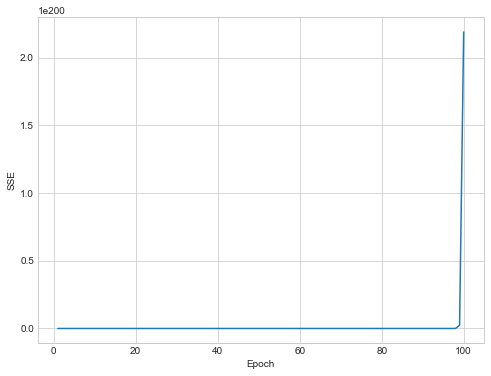

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(1,n_+1),cost_)
plt.ylabel("SSE")
plt.xlabel('Epoch')
plt.show()

(-40, 40)

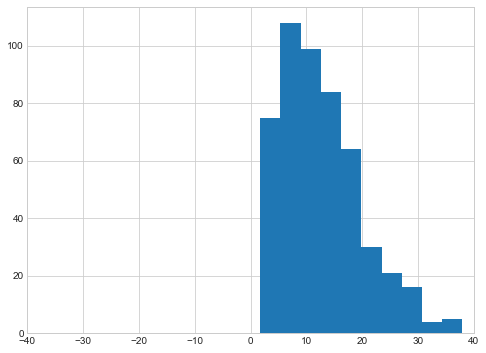

In [25]:
plt.figure(figsize=(8,6))
plt.hist(X)
plt.xlim(-40,40)

## With Pre-processing

In [29]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [32]:
alpha=0.0001
w_=np.zeros(1+X_std.shape[1])
cost_=[]
n_=100

for i in range(n_):
    y_pred=np.dot(X_std,w_[1:])+w_[0]
    errors=(y_std-y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha* errors.sum()
    
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

Text(0.5,0,'Epoch')

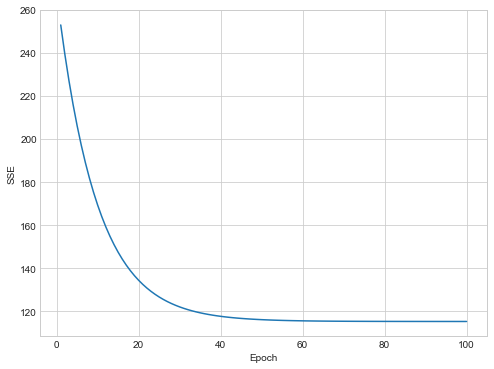

In [33]:
plt.figure(figsize=(8,6))
plt.plot(range(1,n_+1), cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")

(-40, 40)

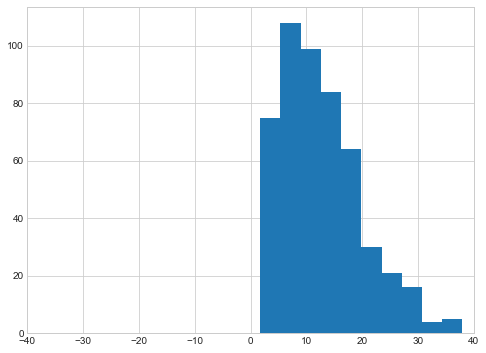

In [34]:
plt.figure(figsize=(8,6))
plt.hist(X)
plt.xlim(-40,40)

(-4, 4)

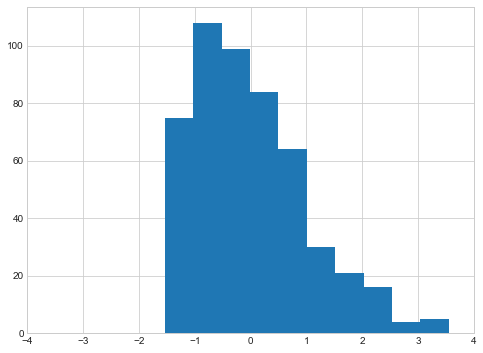

In [36]:
plt.figure(figsize=(8,6))
plt.hist(X_std)
plt.xlim(-4,4)

## Data Pre-processing
     Standardization / Mean Removal
     Min-Max or Scaling Features to a Range
     Normalization
     Binarization

In [37]:
from sklearn import preprocessing

In [39]:
X_train=np.array([[1.,-1.,2.],
                  [2.,0.,0.],
                  [0.,1.,-1]])
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

## Standardization / Mean Removal / Variance Scaling

In [40]:
X_scaled=preprocessing.scale(X_train)

In [41]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Scaled data has zero mean and unit variance 

In [44]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [45]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [46]:
scaler=preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [48]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [49]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

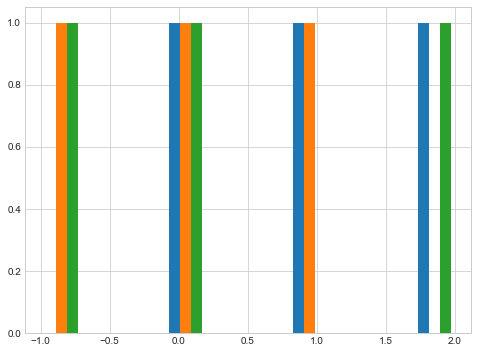

In [51]:
plt.figure(figsize=(8,6))
plt.hist(X_train)
plt.show()

In [52]:
X_test=[[-1.,1.,0.]]

In [53]:
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

## Min-Max or Scaling Features to a Range

## MinMaxScaler
    Scale a data to the [0,1] range:

In [55]:
X_train=np.array([[1.,-1.,2.],
                  [2.,0.,0.],
                  [0.,1.,-1.]])

In [56]:
min_max_scaler = preprocessing.MinMaxScaler()

In [58]:
X_train_minmax=min_max_scaler.fit_transform(X_train)

In [59]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

 Now to unseen data

In [60]:
X_test=np.array([[-3.,1.,4.]])

In [61]:
X_test_minmax=min_max_scaler.transform(X_test)

In [62]:
X_test_minmax

array([[-1.5       ,  1.        ,  1.66666667]])

## MaxAbsScaler
   Works in a very similar fashion, but scales in a way that the training data lies within the range[-1,1] by dividing through      the largest maximum value in the feature. It is meant for data that is already centered at zero or sparse data. 

In [63]:
X_train= np.array([[1.,-1.,2.],
                   [2.,0.,0.],
                   [0.,1.,-1]])

In [64]:
max_abs_scaler=preprocessing.MaxAbsScaler()
X_train_maxabs=max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [67]:
X_test=np.array([[-1.,-0.,-2.],
                 [0.,0.5,-0.6]])
X_test_maxabs=max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-0.5, -0. , -1. ],
       [ 0. ,  0.5, -0.3]])

## Normalization
### L1 normalization- Least Absolute Deviations Ensure the sum of absolute values is 1 in each row
### L2 normalization- Least squares, Ensure that the sum of squares is 1.

In [69]:
X=[[1.,-1.,2.],[2.,0.,0.],[0.,1.,-1.]]
X_normalized=preprocessing.normalize(X,norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

 Alternatively
 
 The preprocessing module further provides a utility class Normalizer that implements the same operation using the Transformer API

In [70]:
normalizer=preprocessing.Normalizer().fit(X) #fit does nothing
normalizer

Normalizer(copy=True, norm='l2')

In [71]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [72]:
normalizer.transform([[-1.,1.,0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

## Binarization

In [73]:
X=[[1.,-1.,2.],[2.,0.,0.],[0.,1.,-1.]]
binarizer=preprocessing.Binarizer().fit(X) #fit does nothing
binarizer

Binarizer(copy=True, threshold=0.0)

In [75]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Modifying the threshold

In [81]:
binarizer= preprocessing.Binarizer(threshold=1.1)

In [82]:
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

## Encoding categorical features

In [83]:
source=['australia','singapore','new zealand','hong kong']

In [94]:
label_enc=preprocessing.LabelEncoder()
src=label_enc.fit_transform(source)

In [95]:
print("country to code mapping:\n")
for k, v in enumerate(label_enc.classes_):
    print(v,'\t',k)

country to code mapping:

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3


In [96]:
test_data=['hong kong','singapore','australia','new zealand']

In [98]:
#result=encoder.transform(test_data)

NameError: name 'encoder' is not defined

## One Hot / One-of-K-Encoding

In [99]:
source

['australia', 'singapore', 'new zealand', 'hong kong']

In [100]:
src

array([0, 3, 2, 1], dtype=int64)

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
one_hot_enc=OneHotEncoder(sparse=False)
src=src.reshape(len(src),1)
one_hot=one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [105]:
invert_res=label_enc.inverse_transform([np.argmax(one_hot[0,:])])
print(invert_res)

['australia']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [106]:
invert_res=label_enc.inverse_transform([np.argmax(one_hot[3,:])])
print(invert_res)

['hong kong']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
